# Asset pricing trading strategy using the Kalman Filter
### Trading strategy for USDGBP using interest rate differentials 

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize as optimize
import statsmodels.api as sm

In [ ]:
interest = pd.read_csv("/Users/Dhriti/Desktop/final_project_data.csv", index_col = 0, parse_dates = True)

In [5]:
interest.columns

Index(['United States Interest', 'United Kingdom Interest',
       'United States Inflation', 'United Kingdom Inflation',
       'United States Unemployment', 'United Kingdom Unemployment', 'DEXUSUK'],
      dtype='object')

Text(0.5, 1.0, 'US Interest Rate')

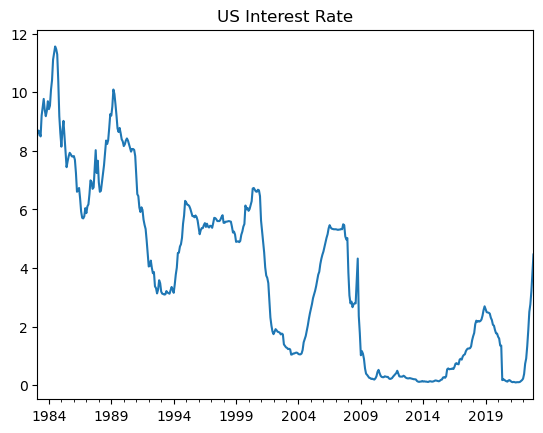

In [6]:
interest["United States Interest"].dropna().plot()
plt.title("US Interest Rate")

Text(0.5, 1.0, 'US Interest Rate')

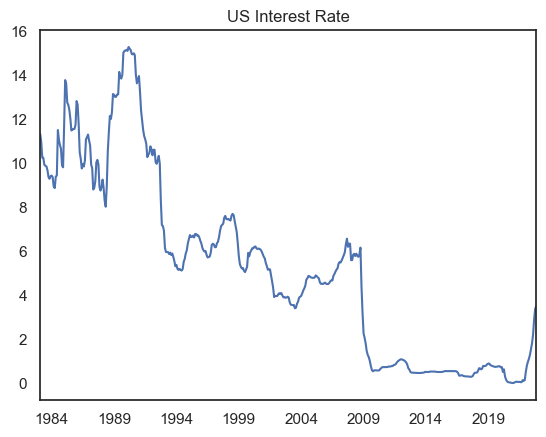

In [204]:
interest["United Kingdom Interest"].dropna().plot()
plt.title("US Interest Rate")

In [7]:
def scale(x):
    return (x-x.min())/(x.max()-x.min())

# Apply Scaling
interest["ir_diff"] = scale(interest["United States Interest"]) - scale(interest["United Kingdom Interest"])
interest.dropna(inplace= True)

<AxesSubplot:title={'center':'Interest Rate Differential With Scaling'}>

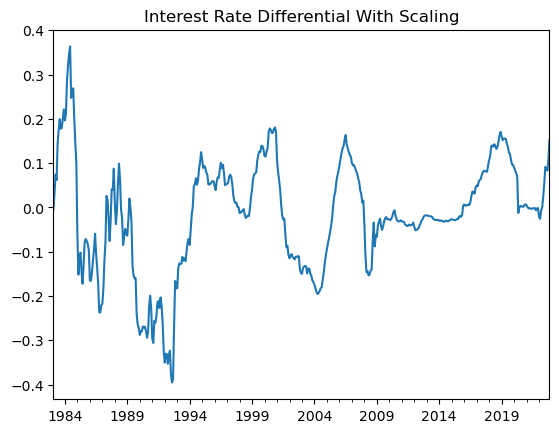

In [8]:
plt.title("Interest Rate Differential With Scaling")
interest["ir_diff"].plot()

In [9]:
interest

,United States Interest,United Kingdom Interest,United States Inflation,United Kingdom Inflation,United States Unemployment,United Kingdom Unemployment,DEXUSUK,ir_diff
1983-02-01,8.54,11.3338,0.037076,0.049259,10.4,10.7,1.5115,-0.004242
1983-03-01,8.69,10.9757,0.034847,0.053428,10.4,10.8,1.4825,0.032309
1983-04-01,8.63,10.2616,0.035903,0.046267,10.3,10.8,1.5573,0.073886
1983-05-01,8.49,10.2593,0.040000,0.040038,10.2,11.0,1.6005,0.061831
1983-06-01,9.20,9.9384,0.034411,0.036957,10.1,10.9,1.5330,0.144766
...,...,...,...,...,...,...,...,...
2022-07-01,2.50,1.8400,0.089330,0.081688,3.6,3.6,1.2183,0.091471
2022-08-01,2.76,2.2300,0.084132,0.087971,3.5,3.5,1.1647,0.088575
2022-09-01,3.21,2.9100,0.082274,0.086530,3.7,3.6,1.1134,0.083235
2022-10-01,3.85,3.3900,0.082149,0.088078,3.5,3.7,1.1515,0.107569


In [10]:
interest.columns

Index(['United States Interest', 'United Kingdom Interest',
       'United States Inflation', 'United Kingdom Inflation',
       'United States Unemployment', 'United Kingdom Unemployment', 'DEXUSUK',
       'ir_diff'],
      dtype='object')

In [11]:
# specify candidate values for hyperparameters
ks = np.linspace(.01, .99, 10)
zs = np.linspace(.01, 3, 10)
ws = np.arange(5, 30, 5)
hs =  1
import itertools as it
# build a grid with all possible hyperparameters
grid = np.array(np.meshgrid(ks,zs, ws, hs)).T.reshape(-1,4)

grid

array([[1.00000000e-02, 1.00000000e-02, 5.00000000e+00, 1.00000000e+00],
       [1.00000000e-02, 3.42222222e-01, 5.00000000e+00, 1.00000000e+00],
       [1.00000000e-02, 6.74444444e-01, 5.00000000e+00, 1.00000000e+00],
       ...,
       [9.90000000e-01, 2.33555556e+00, 2.50000000e+01, 1.00000000e+00],
       [9.90000000e-01, 2.66777778e+00, 2.50000000e+01, 1.00000000e+00],
       [9.90000000e-01, 3.00000000e+00, 2.50000000e+01, 1.00000000e+00]])

In [12]:
interest.head()

,United States Interest,United Kingdom Interest,United States Inflation,United Kingdom Inflation,United States Unemployment,United Kingdom Unemployment,DEXUSUK,ir_diff
1983-02-01,8.54,11.3338,0.037076,0.049259,10.4,10.7,1.5115,-0.004242
1983-03-01,8.69,10.9757,0.034847,0.053428,10.4,10.8,1.4825,0.032309
1983-04-01,8.63,10.2616,0.035903,0.046267,10.3,10.8,1.5573,0.073886
1983-05-01,8.49,10.2593,0.040000,0.040038,10.2,11.0,1.6005,0.061831
1983-06-01,9.20,9.9384,0.034411,0.036957,10.1,10.9,1.5330,0.144766


In [13]:
interest['returns'] =  np.log(interest["DEXUSUK"]).diff()

In [14]:
storage = pd.DataFrame(columns = ["k", "z", "w", "h", "profits"])
df_copy = interest.copy()

for n in range(len(grid)):
    # Each loop we pull out the values for a new set of hyperparamters from the grid
    k,z,w,h= grid[n]
    
    # We fit a filter and CI using the next set of parameters
    df_copy["Filter"] = df_copy["ir_diff"].ewm(alpha = k, adjust = False).mean()
    df_copy["Filter Error"] = df_copy["ir_diff"] -df_copy["Filter"]
    df_copy["std"] = df_copy["Filter Error"].rolling(int(w)).std()
    df_copy["Upper"] = df_copy["Filter"] + z*df_copy["std"]
    df_copy["Lower"] = df_copy["Filter"] - z*df_copy["std"]
    df_copy["test"] = np.where(df_copy["Filter Error"].abs()>z*df_copy["std"], 1, 0)*np.sign(df_copy["Filter Error"])
    
    # create vectors where we can store information on signals and when the change is first signalled
    df_copy["test2"] = 0
    df_copy["signal"] = 0
    
    for j in df_copy.index:
        # if there is a change in the signal, we want to take a position for teh next h periods
        if (df_copy.loc[j, "test"] == 1) &  (df_copy.shift().loc[j, "test"] != 1):
            df_copy.loc[j:j+datetime.timedelta(h), "signal"] = 1
            df_copy.loc[j, "test2"] = 1
        elif (df_copy.loc[j, "test"] == -1) &  (df_copy.shift().loc[j, "test"] != -1):
            df_copy.loc[j:j+datetime.timedelta(h), "signal"] =  -1
            df_copy.loc[j, "test2"] = -1
    
    # calculate metric
    df_copy["cumulative_returns"] = np.exp((df_copy["signal"].shift()*df_copy.returns).cumsum())-1
    
    # store the results
    storage = storage.append({"k":k, "z":z, "w":w, "h":h,
                "profits":df_copy["cumulative_returns"][-1]}, ignore_index = True)
    # print so I can track progress of loop (can take a few minutes)
    print(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
storage = storage.sort_values(by = "profits").reset_index(drop = True)

In [16]:
storage

,k,z,w,h,profits
0,0.881111,0.342222,25.0,1.0,-0.496221
1,0.772222,0.342222,25.0,1.0,-0.445555
2,0.663333,0.342222,25.0,1.0,-0.430352
3,0.336667,0.342222,25.0,1.0,-0.406931
4,0.336667,0.342222,20.0,1.0,-0.401492
...,...,...,...,...,...
495,0.336667,2.003333,20.0,1.0,0.199554
496,0.881111,0.010000,20.0,1.0,0.220499
497,0.118889,1.338889,5.0,1.0,0.222131
498,0.554444,2.003333,5.0,1.0,0.245886


### Visualizing Heatmap

In [17]:
def heatmap(x, y, metric, values):
    
    # specify the columns I will be pulling from the results
    p2p = values[[x, y, metric]]
    
    # If p > 2, we need to group 
    heat = np.round(p2p.groupby([x,y]).max(),1)
    heat = heat.unstack()[metric]

    # round labels
    heat.index = np.round(heat.index,2)
    heat.columns = np.round(heat.columns,2)

    # make plot
    f, ax = plt.subplots(figsize=(25, 12))
    ax = sns.heatmap(heat, fmt='.1g')
    ax.set_title("Heat map of "+ metric,size = 18)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(y, size = 18)
    ax.set_ylabel(x, size = 18)
    ax.collections[0].colorbar.set_label(metric, size = 18)
    sns.set(font_scale=1)
    plt.show()

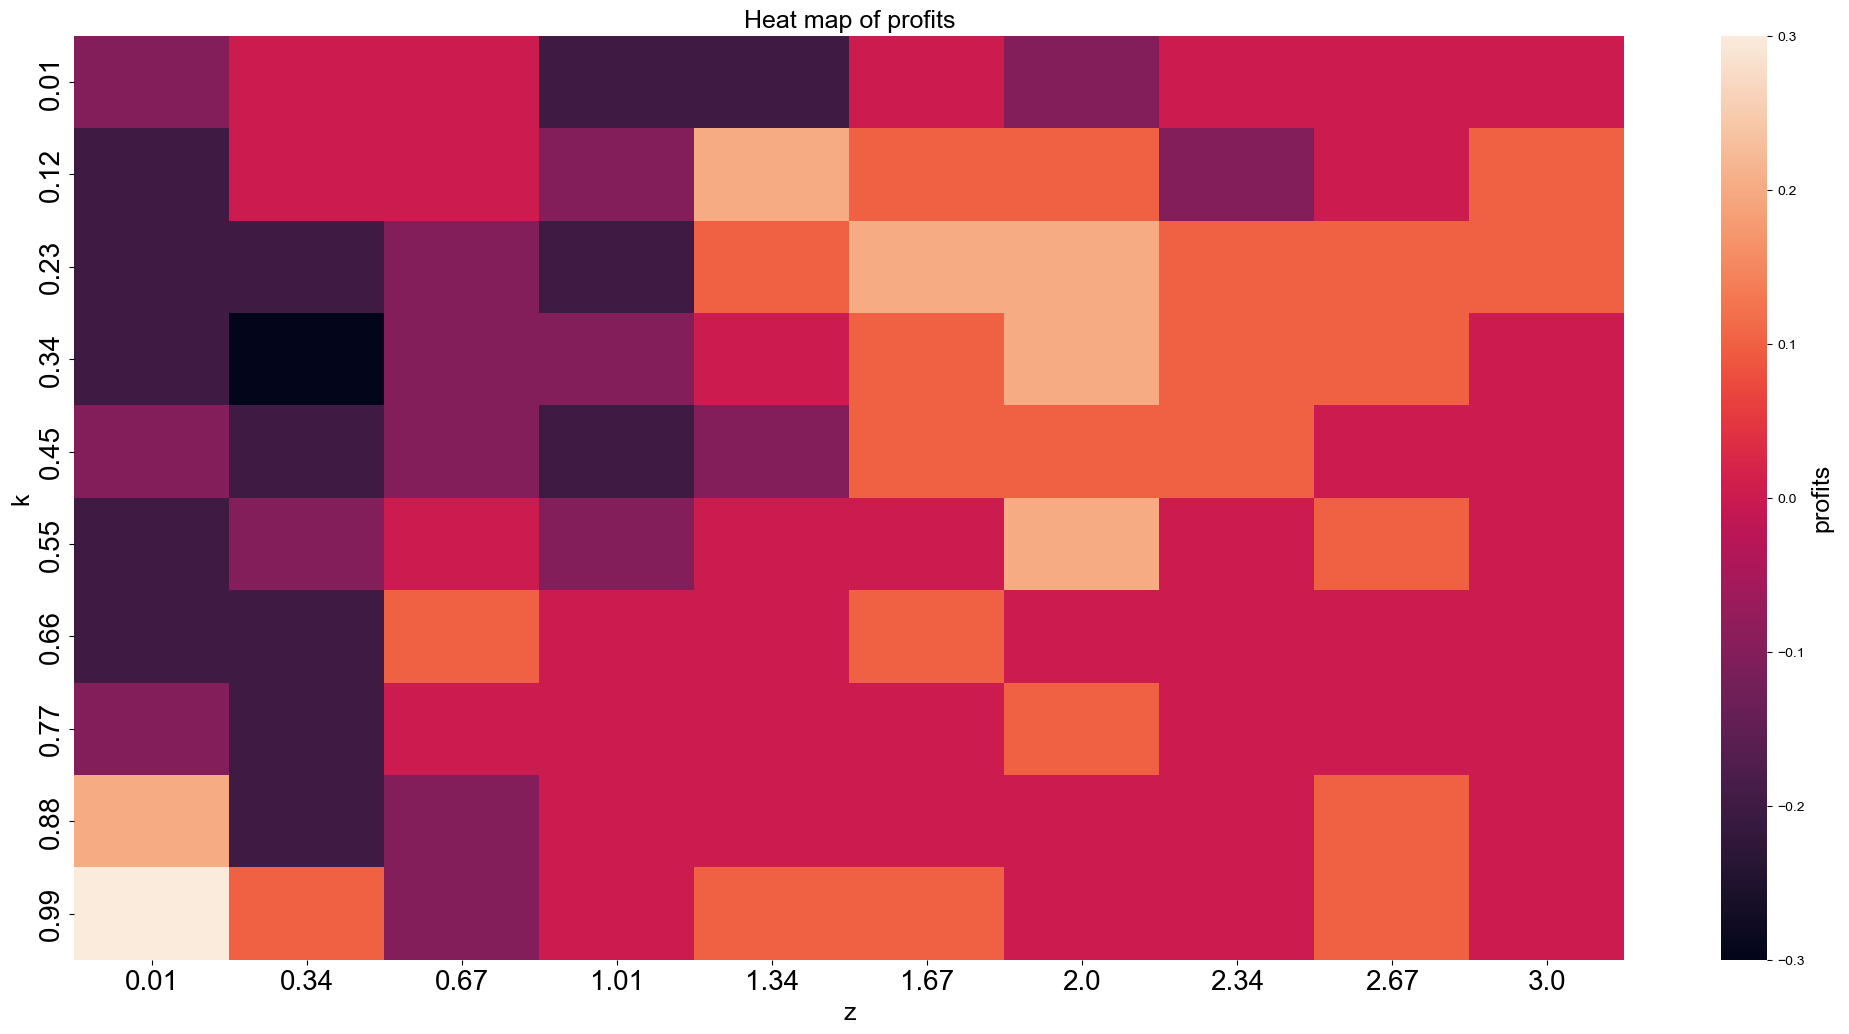

In [18]:
heatmap("k", "z","profits", storage)

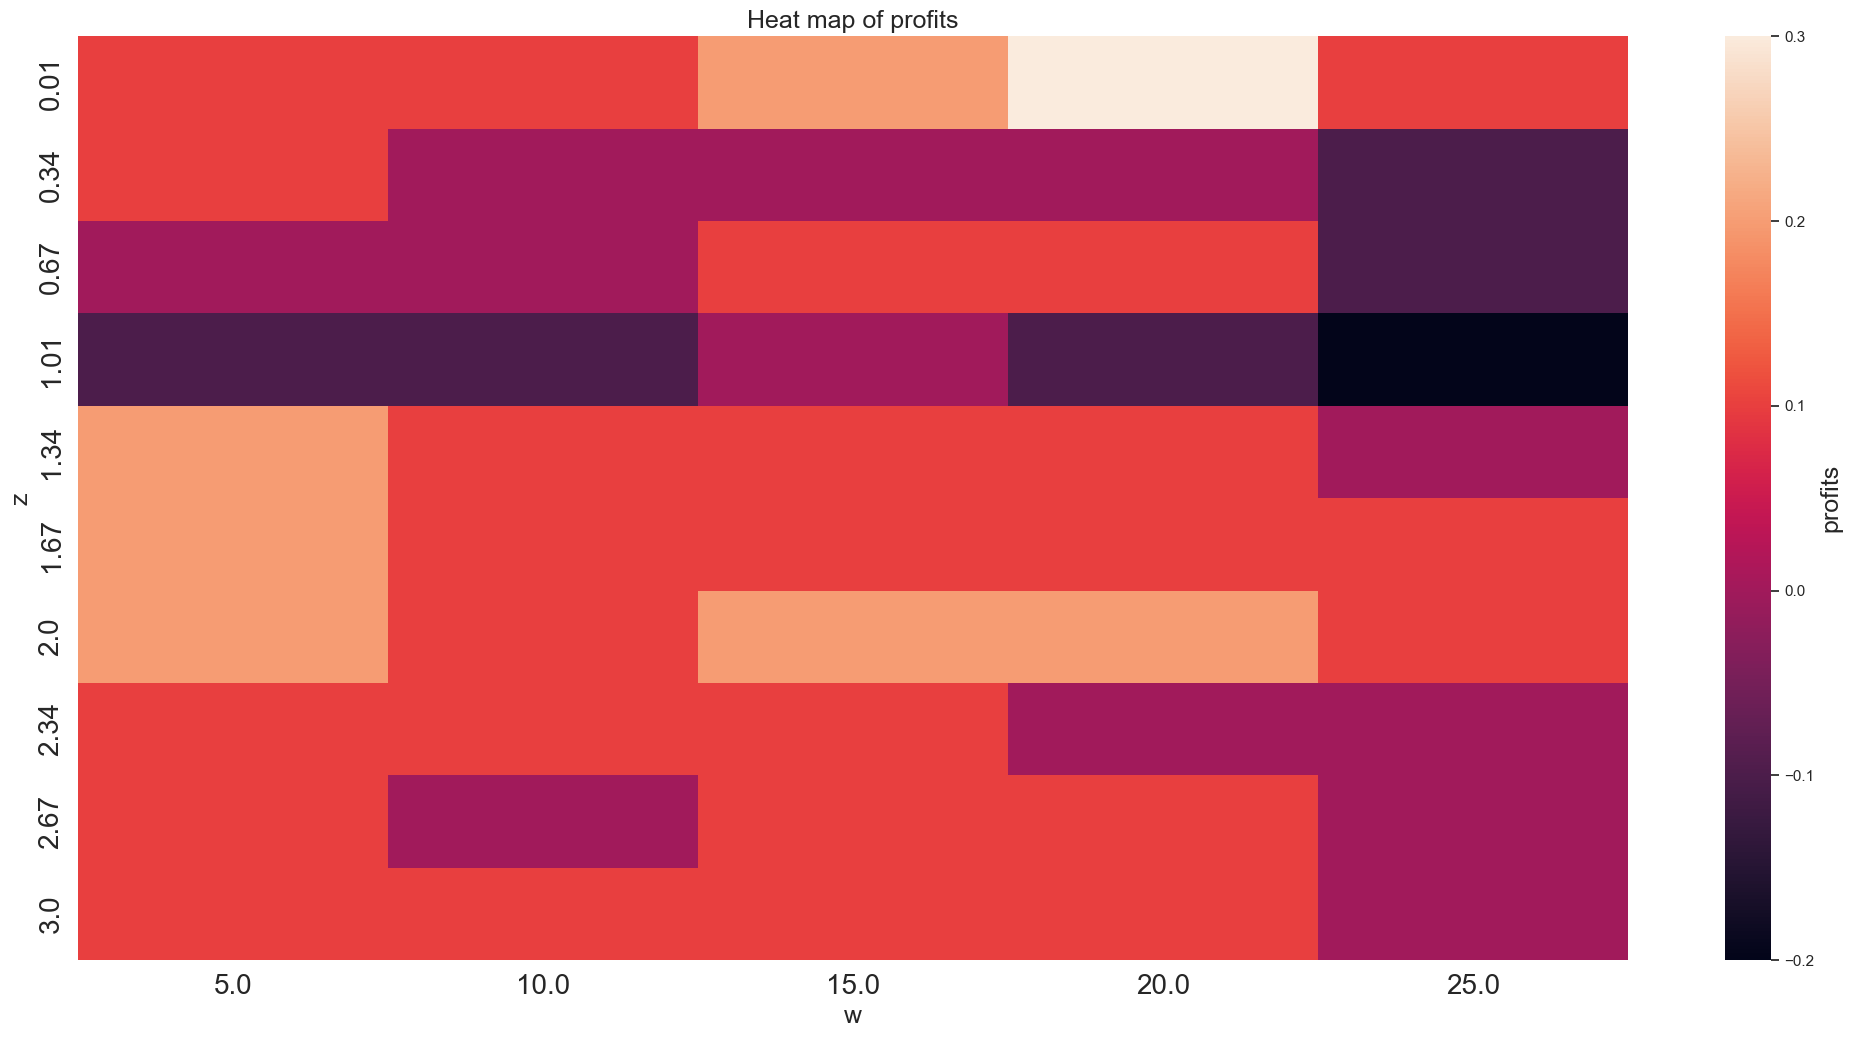

In [19]:
heatmap("z", "w","profits", storage)

### Choosing parameters after gridsearch

In [113]:
k,z,w, h =  (0.99, 0.01, 20.0, 1)

df_copy["Filter"] = df_copy["ir_diff"].ewm(alpha = k, adjust = False).mean()
df_copy["Filter Error"] = df_copy["ir_diff"] -df_copy["Filter"]
df_copy["std"] = df_copy["Filter Error"].rolling(int(w)).std()
df_copy["Upper"] = df_copy["Filter"] + z*df_copy["std"]
df_copy["Lower"] = df_copy["Filter"] - z*df_copy["std"]

df_copy["test"] = np.where(df_copy["Filter Error"].abs()>z*df_copy["std"], 1, 0)*np.sign(df_copy["Filter Error"])

df_copy["test2"] = 0
df_copy["signal"] = 0
for j in df_copy.index:
    if (df_copy.loc[j, "test"] == 1) &  (df_copy.shift().loc[j, "test"] != 1):
        df_copy.loc[j:j+datetime.timedelta(h), "signal"] = 1
        df_copy.loc[j, "test2"] = 1
    elif (df_copy.loc[j, "test"] == -1) &  (df_copy.shift().loc[j, "test"] != -1):
        df_copy.loc[j:j+datetime.timedelta(h), "signal"] =  -1
        df_copy.loc[j, "test2"] = -1
df_copy["cumulative_returns"] = np.exp((df_copy["signal"].shift()*df_copy.returns).cumsum())-1
df_copy["strat_returns"] = df_copy["signal"].shift()*df_copy.returns

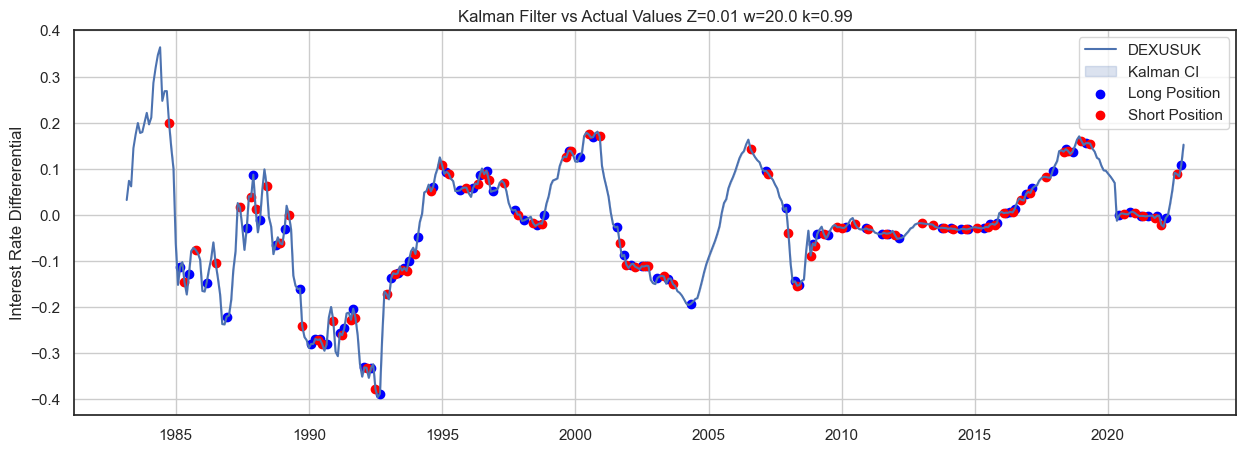

In [114]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (15, 5))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Interest Rate Differerential")
ax.plot(df_copy["ir_diff"])

ax.fill_between(df_copy.index, df_copy.Lower, df_copy.Upper, color='b', alpha=.2)
ax.scatter(df_copy[df_copy.test2 == 1].index, df_copy[df_copy.test2 == 1]["ir_diff"], color = "blue")
ax.scatter(df_copy[df_copy.test2 == -1].index, df_copy[df_copy.test2 == -1]["ir_diff"], color = "red")

#ax.axvline(df_copy.index[-5], color = "red", linestyle = '--')
ax.legend(["DEXUSUK", "Kalman CI", "Long Position", "Short Position"])


#plt.xlim([datetime.date(2000, 1, 1), datetime.date(2004, 1, 1)])
ax.grid()

In [115]:
df_copy["success"] = ((df_copy[df_copy.test2 != 0]["cumulative_returns"].diff()>0)*1).shift(-1)

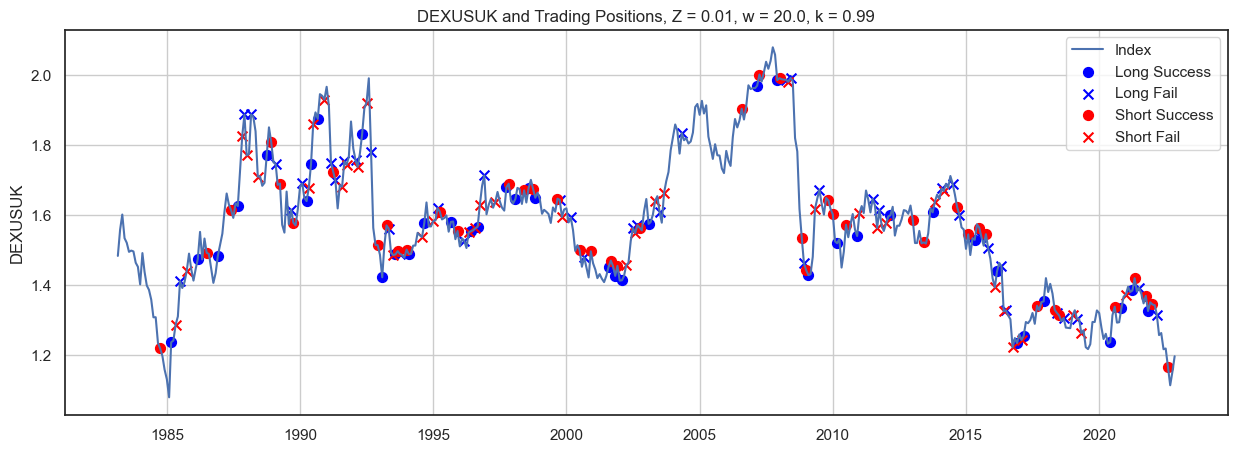

In [116]:
plt.figure(figsize = (15, 5))

plt.title("DEXUSUK and Trading Positions"+ ", Z = "+str(z) + ", w = " + str(w)+ ", k = " + str(k))
plt.ylabel("DEXUSUK")
plt.plot(df_copy["DEXUSUK"])

longsuccess = df_copy[(df_copy["success"] == 1) & (df_copy["test2"] == 1)]
longfail = df_copy[(df_copy["success"] == 0) & (df_copy["test2"] == 1)] 
shortsuccess = df_copy[(df_copy["success"] == 1) & (df_copy["test2"] == -1)]
shortfail = df_copy[(df_copy["success"] == 0) & (df_copy["test2"] == -1)]

plt.scatter(longsuccess.index, longsuccess["DEXUSUK"], color = 'blue', s = 50)
plt.scatter(longfail.index, longfail["DEXUSUK"], color = 'blue', s = 50, marker = "x")

plt.scatter(shortsuccess.index, shortsuccess["DEXUSUK"], color = 'red', s = 50)
plt.scatter(shortfail.index, shortfail["DEXUSUK"], color = 'red', s = 50, marker = "x")

plt.legend(["Index", "Long Success", "Long Fail", "Short Success", "Short Fail"])
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
plt.grid()

### Visualizing Equity Curve

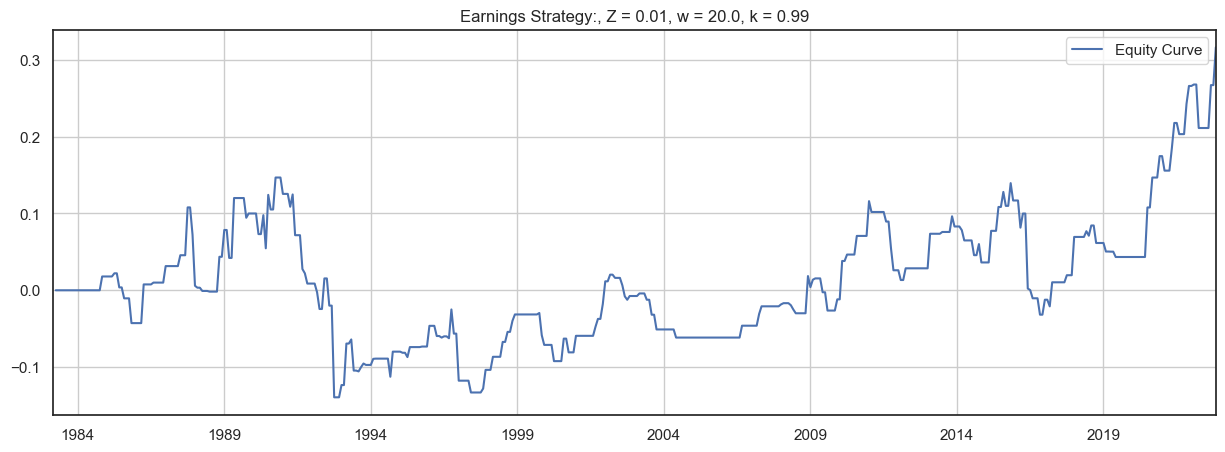

In [117]:
plt.figure(figsize = (15, 5))
(df_copy["cumulative_returns"]).plot()

plt.title("Earnings Strategy:"+ ", Z = "+str(z) + ", w = " + str(w)+ ", k = " + str(k))

plt.legend(["Equity Curve"])

plt.grid()

### Binomial test 

In [141]:
start = df_copy[["DEXUSUK", 'strat_returns', "signal"]][123:].index[0]

In [142]:
df3 = df_copy[df_copy.test != 0][["signal", "DEXUSUK"]].copy()
df3['D'] = df3["signal"]

In [143]:
df3 = df3[:-2].copy()

In [145]:
df3['s_current'] = df_copy[df_copy.index.isin(df3.index)]["DEXUSUK"].values
df3['s_future'] = df_copy[df_copy.index.isin(df3.index+datetime.timedelta())]["DEXUSUK"].values


# Get the realized exchange rate
df3['R'] = np.where(df3['s_future'] >= df3['s_current'], 1, -1)

In [127]:
## Sample Covariance
df3['W'] = (df3['D']-np.mean(df3['D']))*(df3['R']-np.mean(df3['R']))
T_B = np.mean(df3['W'])

In [42]:
T_B

0.06675495179916575

In [134]:
## Newey-West LRV estimator
dy = df3['W'] - np.mean(df3['W'])
gamma_0 = sum((dy)**2)/len(df3)
gamma_1 = np.mean((dy*dy.shift(-1))[:len(df3)-1])
LRV = gamma_0 + 2*(1-1/2)*gamma_1

In [46]:
## Test-statistic
from scipy.stats import norm

statistic = T_B/np.sqrt(LRV/df3.shape[0])
print('Test statistic : ', statistic, ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic :  1.468713808217751 , 5 % critical value :  1.64


#### We fail to reject the null hypothesis, that our directional forecasts are uncorrelated with the realized directional changes.

In [215]:
# Below are teh two sets of parameters that I used to generate the visualizations you see in the slides

# k,z,w, h =  (0.99, 0.01, 20.0, 1)
k = 0.99
z = 0.01
w = 10
h = 1
# Version with CI
#k = 0.445556
#w = 10
#z = 1.006667

# This implements the kalman filter in python
# It is simple otherwise to create using a for loop
interest["Filter"] = interest.ir_diff.ewm(alpha = k, adjust = False).mean()

# Compute the filter error
interest["Filter Error"] = interest.ir_diff - interest["Filter"]

# compute the rolling standard deviation
interest["std"] = interest["Filter Error"].rolling(w).std()

# create our confidence intervals or "boundaries of inaction"
# these are scaled by teh number of standard deviations "z"
interest["Upper"] = interest["Filter"] + z*interest["std"]
interest["Lower"] = interest["Filter"] - z*interest["std"]

# Create signal that evaluates whether we are outside the threshold
# then multiply by the direction of the mistake
# (we use economic theory to decide which direction is long or short)
interest["test"] = np.where(interest["Filter Error"].abs()>z*interest["std"], -1, 0)*np.sign(interest["Filter Error"])
# Create a dataframe at a daily frequency wiyh start and end 
# dates that cover the observation period
drange = pd.date_range(start =interest.index[0], end = "01/01/2023")
daily  = pd.DataFrame(index = drange)

# Integrate the monthly dta into the daily data
daily["test"] = interest["test"]

daily["Upper"] = interest["Upper"]
daily["Lower"] = interest["Lower"]
daily["Filter"] = interest["Filter"]
daily["ir_diff"] = interest["ir_diff"]

# Fill NA values with the last available value
daily["Upper"] = daily["Upper"].ffill()
daily["Lower"] = daily["Lower"].ffill()
daily["Filter"] = daily["Filter"].ffill()
daily["ir_diff"] = daily["ir_diff"].ffill()

# fill the remaining NA values with 0's
# also populates the 
daily = daily.fillna(0)

In [216]:
df3['W_2'] = df3['D']*(df3['s_future']-df3['s_current'])
T_WB = np.mean(df3['W_2'])

In [217]:
T_WB

0.0

In [218]:
dy_2 = df3['W_2'] - T_WB
gamma_0 = sum((dy_2)**2)/len(df3)
gamma_1 = np.mean((dy_2*dy_2.shift(-1))[:len(df3)-1])
LRV_2 = gamma_0 + 2*(1-1/2)*gamma_1

In [219]:
statistic_2 = T_WB/np.sqrt(LRV_2/len(df3))
print('Test statistic :' , statistic_2 , ', 5 % critical value : ', round(norm.ppf(0.95),2))

Test statistic : nan , 5 % critical value :  1.64


#### We fail to reject the null hypothesis

### Calculating HFRI Metrics

#### Geo. Avg Monthly

In [47]:
# Calculate monthly returns and drop any missing values
df_copy['monthly_returns'] = df_copy[['strat_returns']]
df_copy.dropna(subset=['monthly_returns'], inplace=True)

# Calculate the geometric average monthly return
geo_avg_monthly = (1 + df_copy['monthly_returns']).prod()**(1/len(df_copy)) - 1

print('Geometric Average Monthly Return:', geo_avg_monthly)

Geometric Average Monthly Return: 0.0004367427258307188


#### Std. Deviation

In [48]:
returns = df_copy[['strat_returns']]

# Calculate standard deviation of 'returns'
std_dev = np.std(returns)

# Print the result
print('Standard deviation of returns:', std_dev)


Standard deviation of returns: strat_returns    0.016586
dtype: float64


#### High Month

In [49]:
index = df_copy["strat_returns"].argmax()
high_month = df_copy.iloc[index]["strat_returns"]
high_month

0.07210606057017793

#### Low Month

In [50]:
index = df_copy["strat_returns"].argmin()
low_month = df_copy.iloc[index]["strat_returns"]
low_month

-0.12976430605527856

#### Annualized Return

In [51]:
total_return = df_copy[['strat_returns']].sum()
annualized_return = ((1 + total_return) ** (12 / len(df_copy))) - 1

In [52]:
print(f'Total Rate of Return:',total_return)
print(f'Annualized Return:',annualized_return)

Total Rate of Return: strat_returns    0.274662
dtype: float64
Annualized Return: strat_returns    0.006124
dtype: float64


#### Annualized Std

In [53]:
# Calculate the annualized standard deviation of returns
annualized_std = np.std(df_copy['strat_returns']) * np.sqrt(12)
annualized_std

0.05745436245574577

#### Risk Free Rate

In [146]:
rate = pd.read_csv('/Users/Dhriti/Desktop/1-year-treasury-rate-yield-chart.csv', index_col = 0, parse_dates = True)
cols = [i for i in df_copy.columns]
cols.append('risk_free')

2.58

#### Sharpe Ratio

In [62]:
rate = pd.read_csv('/Users/Dhriti/Desktop/1-year-treasury-rate-yield-chart.csv', index_col = 0, parse_dates = True)
cols = [i for i in df_copy.columns]
cols.append('risk_free')

In [63]:
ratio = pd.merge_asof(df_copy, rate,left_index = True, right_index = True)
ratio

,United States Interest,United Kingdom Interest,United States Inflation,United Kingdom Inflation,United States Unemployment,United Kingdom Unemployment,DEXUSUK,ir_diff,returns,Filter,...,Lower,test,test2,signal,cumulative_returns,strat_returns,success,monthly_returns,cumulative_Cummax,value
1983-03-01,8.69,10.9757,0.034847,0.053428,10.4,10.8,1.4825,0.032309,-0.019373,0.031943,...,NaN,0.0,0,0,0.000000,-0.000000,NaN,-0.000000,0.000000,8.58
1983-04-01,8.63,10.2616,0.035903,0.046267,10.3,10.8,1.5573,0.073886,0.049224,0.073466,...,NaN,0.0,0,0,0.000000,0.000000,NaN,0.000000,0.000000,9.34
1983-05-01,8.49,10.2593,0.040000,0.040038,10.2,11.0,1.6005,0.061831,0.027363,0.061947,...,NaN,-0.0,0,0,0.000000,0.000000,NaN,0.000000,0.000000,8.75
1983-06-01,9.20,9.9384,0.034411,0.036957,10.1,10.9,1.5330,0.144766,-0.043089,0.143938,...,NaN,0.0,0,0,0.000000,-0.000000,NaN,-0.000000,0.000000,9.39
1983-07-01,9.50,9.8919,0.024742,0.036544,10.1,11.0,1.5200,0.173969,-0.008516,0.173669,...,NaN,0.0,0,0,0.000000,-0.000000,NaN,-0.000000,0.000000,9.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,2.50,1.8400,0.089330,0.081688,3.6,3.6,1.2183,0.091471,0.001725,0.091095,...,0.091094,1.0,0,0,0.211104,0.000000,NaN,0.000000,0.267683,2.79
2022-08-01,2.76,2.2300,0.084132,0.087971,3.5,3.5,1.1647,0.088575,-0.044993,0.088600,...,0.088599,-1.0,-1,-1,0.211104,-0.000000,1.0,-0.000000,0.267683,2.98
2022-09-01,3.21,2.9100,0.082274,0.086530,3.7,3.6,1.1134,0.083235,-0.045045,0.083288,...,0.083287,-1.0,0,0,0.266906,0.045045,NaN,0.045045,0.267683,3.51
2022-10-01,3.85,3.3900,0.082149,0.088078,3.5,3.7,1.1515,0.107569,0.033647,0.107326,...,0.107325,1.0,1,1,0.266906,0.000000,NaN,0.000000,0.267683,4.05


In [64]:
returns = ratio[["strat_returns"]].copy().dropna()
returns["risk_free"] = (ratio[[' value']].dropna()/100+1)**(1/12)-1
returns["excess_return"] = returns['strat_returns'] - returns['risk_free']
sharpe = (returns["excess_return"].mean())/(returns["excess_return"].std())
sharpe

-0.1488833310987557

#### % of Winning Month

In [65]:
n_wins = len(df_copy[df_copy.strat_returns >0])
print("Percent winning months will be:", n_wins/len(df_copy)*100)

Percent winning months will be: 17.81970649895178


#### Max Drawdown

In [66]:
df_copy["cumulative_Cummax"] = df_copy['cumulative_returns'].cummax()

In [67]:
drawdown = ((df_copy['cumulative_returns']-df_copy["cumulative_Cummax"])/df_copy["cumulative_Cummax"]).min()
drawdown

-2.93483752937235

#### Alpha

In [171]:
import yfinance as yf
sp500 = yf.download("^GSPC")[["Adj Close"]]
rf_rate = rate.resample("M").first()

[*********************100%***********************]  1 of 1 completed


In [172]:
sp500

,Adj Close
Date,
1927-12-30 00:00:00-05:00,17.660000
1928-01-03 00:00:00-05:00,17.760000
1928-01-04 00:00:00-05:00,17.719999
1928-01-05 00:00:00-05:00,17.549999
1928-01-06 00:00:00-05:00,17.660000
...,...
2023-03-20 00:00:00-04:00,3951.570068
2023-03-21 00:00:00-04:00,4002.870117
2023-03-22 00:00:00-04:00,3936.969971


In [173]:
ratio = pd.merge_asof(df_copy, rf_rate,left_index = True, right_index = True)
data = pd.merge_asof(ratio, sp500,left_index = True, right_index = True)

In [174]:
index = data.index 
data['Profit'] = data["strat_returns"]- data[' value']
data['sp500'] = data['Adj Close'] - data[' value']
data

,United States Interest,United Kingdom Interest,United States Inflation,United Kingdom Inflation,United States Unemployment,United Kingdom Unemployment,DEXUSUK,ir_diff,returns,Filter,...,signal,cumulative_returns,strat_returns,success,monthly_returns,cumulative_Cummax,value,Adj Close,Profit,sp500
1983-03-01,8.69,10.9757,0.034847,0.053428,10.4,10.8,1.4825,0.032309,-0.019373,0.032309,...,0,NaN,NaN,NaN,-0.000000,0.000000,8.93,148.059998,NaN,139.129998
1983-04-01,8.63,10.2616,0.035903,0.046267,10.3,10.8,1.5573,0.073886,0.049224,0.073470,...,0,0.000000,0.000000,NaN,0.000000,0.000000,8.58,152.960007,-8.580000,144.380007
1983-05-01,8.49,10.2593,0.040000,0.040038,10.2,11.0,1.6005,0.061831,0.027363,0.061947,...,0,0.000000,0.000000,NaN,0.000000,0.000000,9.35,164.429993,-9.350000,155.079993
1983-06-01,9.20,9.9384,0.034411,0.036957,10.1,10.9,1.5330,0.144766,-0.043089,0.143938,...,0,0.000000,-0.000000,NaN,-0.000000,0.000000,8.69,162.389999,-8.690000,153.699999
1983-07-01,9.50,9.8919,0.024742,0.036544,10.1,11.0,1.5200,0.173969,-0.008516,0.173669,...,0,0.000000,-0.000000,NaN,-0.000000,0.000000,9.39,167.639999,-9.390000,158.249999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,2.50,1.8400,0.089330,0.081688,3.6,3.6,1.2183,0.091471,0.001725,0.091095,...,0,0.211104,0.000000,NaN,0.000000,0.267683,2.16,3785.379883,-2.160000,3783.219883
2022-08-01,2.76,2.2300,0.084132,0.087971,3.5,3.5,1.1647,0.088575,-0.044993,0.088600,...,-1,0.211104,-0.000000,1.0,-0.000000,0.267683,2.79,4130.290039,-2.790000,4127.500039
2022-09-01,3.21,2.9100,0.082274,0.086530,3.7,3.6,1.1134,0.083235,-0.045045,0.083288,...,0,0.266906,0.045045,NaN,0.045045,0.267683,2.98,3955.000000,-2.934955,3952.020000
2022-10-01,3.85,3.3900,0.082149,0.088078,3.5,3.7,1.1515,0.107569,0.033647,0.107326,...,1,0.266906,0.000000,NaN,0.000000,0.267683,3.51,3585.620117,-3.510000,3582.110117


In [182]:
import statsmodels.formula.api as smf 
model =smf.ols('Profit~sp500', data = data ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     340.6
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.05e-57
Time:                        12:24:58   Log-Likelihood:                -1075.1
No. Observations:                 476   AIC:                             2154.
Df Residuals:                     474   BIC:                             2163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2569      0.170    -36.703      0.000      -6.592      -5.922
sp500          0.0019      0.000     18.455      0.000       0.002       0.002
==============================================================================
Omnibus:                       28.608   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.117
Skew:                          -0.036   Prob(JB):                      0.00385
Kurtosis:                       2.255   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
# Extract alpha value (intercept)
alpha = model.params['Intercept']

print(f"Alpha (intercept) value: {alpha}")

Alpha (intercept) value: -6.256856104306901


#### Beta

In [194]:
beta = model.params['sp500']
print("Beta coefficient:", beta)

Beta coefficient: 0.001931758827422643


Beta is 0.0019

#### Mnt R-squared

In [183]:
# Get R-squared value
r_squared = model.rsquared

# Print R-squared value
print("R-squared:", r_squared)

R-squared: 0.41810345158974505


#### Correlation

In [74]:
np.corrcoef(data["strat_returns"], data["sp500"])

array([[1.        , 0.07947939],
       [0.07947939, 1.        ]])

#### Up Alpa

In [199]:
new = pd.merge_asof(ratio, sp500,left_index = True, right_index = True)

In [220]:
# new = pd.merge_asof(ratio, sp500,left_index = True, right_index = True)
cal = new.copy()
index = cal.index 
cal['Profit'] = cal["strat_returns"]- cal[' value']
cal['sp500'] = cal['Adj Close'] - cal[' value']
cal_up = cal[cal['strat_returns'] > 0]
up = smf.ols('Profit~sp500', data = cal_up ).fit()
up.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     53.31
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.57e-10
Time:                        16:15:40   Log-Likelihood:                -190.38
No. Observations:                  85   AIC:                             384.8
Df Residuals:                      83   BIC:                             389.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.6761      0.390    -14.549      0.000      -6.452      -4.900
sp500          0.0016      0.000      7.301      0.000       0.001       0.002
==============================================================================
Omnibus:                        2.364   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.637
Skew:                          -0.112   Prob(JB):                        0.441
Kurtosis:                       2.358   Cond. No.                     2.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [221]:
# Extract alpha value (intercept)
alpha = up.params['Intercept']

print(f"Alpha (intercept) value: {alpha}")

Alpha (intercept) value: -5.676084731882467


#### Up Beta

In [222]:
beta = up.params['sp500']
print("Beta coefficient:", beta)

Beta coefficient: 0.0015638787285694382


#### Up R-squared

In [187]:
# Get R-squared value
r_squared = up.rsquared

# Print R-squared value
print("R-squared:", r_squared)

R-squared: 0.3910985316833355


#### Down Alpha

In [96]:
cal_down = cal[cal['strat_returns'] < 0]
cal_down

,United States Interest,United Kingdom Interest,United States Inflation,United Kingdom Inflation,United States Unemployment,United Kingdom Unemployment,DEXUSUK,ir_diff,returns,Filter,...,signal,cumulative_returns,strat_returns,success,monthly_returns,cumulative_Cummax,value,Adj Close,Profit,sp500
1985-06-01,7.44,12.4373,0.035749,0.070030,7.2,11.300000,1.3095,-0.172477,0.018109,-0.172201,...,0,0.003738,-0.018109,NaN,-0.018109,0.022080,8.89,189.550003,-8.908109,180.660003
1985-08-01,7.81,11.4952,0.034582,0.068508,7.4,11.200000,1.3910,-0.078465,-0.014276,-0.078972,...,0,-0.010490,-0.014276,NaN,-0.014276,0.022080,7.72,190.919998,-7.734276,183.199998
1985-11-01,7.81,11.5705,0.032350,0.054400,7.1,11.200000,1.4890,-0.083401,0.033114,-0.083325,...,0,-0.042720,-0.033114,NaN,-0.033114,0.022080,7.94,189.820007,-7.973114,181.880007
1987-12-01,7.66,8.7688,0.045290,0.041289,5.8,9.600000,1.8860,0.087168,0.032549,0.086688,...,1,0.072342,-0.032549,0.0,-0.032549,0.107821,6.98,230.300003,-7.012549,223.320003
1988-01-01,6.92,8.9305,0.043321,0.037149,5.7,9.400000,1.7691,0.012053,-0.063987,0.012799,...,-1,0.005875,-0.063987,0.0,-0.063987,0.107821,7.05,247.080002,-7.113987,240.030002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-01,2.47,0.8200,0.018531,0.018078,3.8,3.700000,1.3030,0.155715,-0.000153,0.155710,...,0,0.050245,-0.000153,NaN,-0.000153,0.146688,2.55,2834.399902,-2.550153,2831.849902
2019-06-01,2.30,0.7800,0.017935,0.018886,3.6,3.800000,1.2704,0.143515,0.006634,0.143624,...,0,0.043300,-0.006634,NaN,-0.006634,0.146688,2.39,2752.060059,-2.396634,2749.670059
2021-02-01,0.11,0.0500,0.013948,0.009234,6.3,4.911003,1.3947,0.000433,0.016191,0.000472,...,0,0.155655,-0.016191,NaN,-0.016191,0.174519,0.10,3714.239990,-0.116191,3714.139990
2021-08-01,0.10,0.0700,0.052215,0.020147,5.4,4.451372,1.3747,-0.001750,-0.012003,-0.001757,...,0,0.203141,-0.012003,NaN,-0.012003,0.217669,0.09,4395.259766,-0.102003,4395.169766


In [191]:
# new = pd.merge_asof(ratio, sp500,left_index = True, right_index = True)
cal = new.copy()
index = cal.index 
cal['Profit'] = cal["strat_returns"]- cal[' value']
cal['sp500'] = cal['Adj Close'] - cal[' value']
cal_up = cal[cal['strat_returns'] < 0]
down = smf.ols('Profit~sp500', data = cal_up ).fit()
down.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     58.21
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           5.24e-11
Time:                        12:26:45   Log-Likelihood:                -173.31
No. Observations:                  79   AIC:                             350.6
Df Residuals:                      77   BIC:                             355.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9073      0.393    -15.039      0.000      -6.690      -5.125
sp500          0.0020      0.000      7.630      0.000       0.001       0.002
==============================================================================
Omnibus:                       44.377   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.882
Skew:                          -0.005   Prob(JB):                       0.0528
Kurtosis:                       1.663   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
# Extract alpha value (intercept)
alpha = down.params['Intercept']

print(f"Alpha (intercept) value: {alpha}")

Alpha (intercept) value: -5.907348685130195


#### Down Beta

In [196]:
beta = down.params['sp500']
print("Beta coefficient:", beta)

Beta coefficient: 0.001961638175952356


#### Down R-squared

In [193]:
# Get R-squared value
r_squared = down.rsquared

# Print R-squared value
print("R-squared:", r_squared)

R-squared: 0.43051366357189136
